In [2]:
# Mounting to Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Installing Packages once and load the MNIST dataset once into Drive

In [ ]:
# import numpy as np
# from tensorflow.keras.datasets import mnist

# # Load once from Keras
# (x_train, _), (x_test, _) = mnist.load_data()

# # Save into your Google Drive
# save_path = '/content/drive/MyDrive/Colab_Notebooks/AutoencoderModel/mnist.npz'
# np.savez_compressed(save_path, x_train=x_train, x_test=x_test)

# print("Saved MNIST to:", save_path)


Saved MNIST to: /content/drive/MyDrive/Colab_Notebooks/AutoencoderModel/mnist.npz


In [ ]:
# TensorFlow and basic packages
!pip install tensorflow numpy matplotlib


In [ ]:
!pip install matplotlib

In [3]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dense, Flatten, Reshape
from tensorflow.keras.layers import Dropout




In [4]:


# Load saved dataset
data = np.load('/content/drive/MyDrive/Colab_Notebooks/AutoencoderModel/mnist.npz')
x_train = data['x_train']
x_test = data['x_test']


In [5]:
# Normalizing data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))


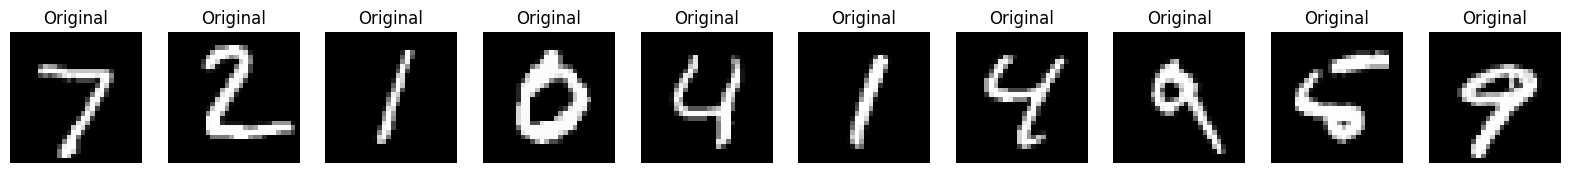

In [6]:
# Plotting the original images

n = 10  # how many images to show
plt.figure(figsize=(20, 4))

# Original
for i in range(n):
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
  plt.title("Original")
  plt.axis("off")

plt.show()


In [7]:
# Adding Noise to the Dataset
# Adding Random Noise (Gaussian)

# Setting noise factor
noise_factor = 1

# Adding noise and clip the values to stay between 0 and 1
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


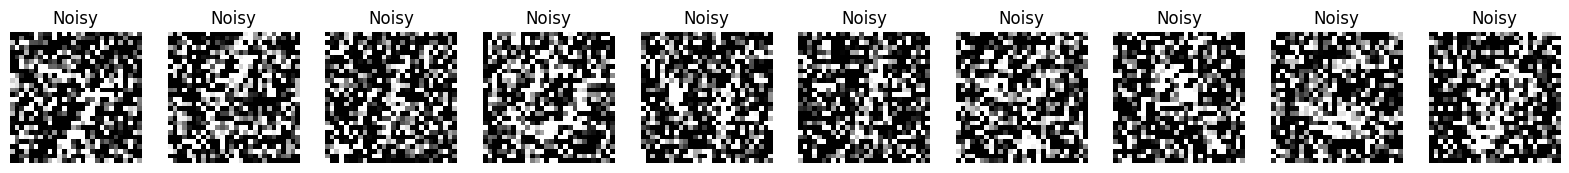

In [8]:
# Plotting moisy images

n = 10  # how many images to show
plt.figure(figsize=(20, 4))

for i in range(n):
    # Noisy
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="gray")
    plt.title("Noisy")
    plt.axis("off")
plt.show()


In [107]:
# Building the Autoencoder Model


# Input shape for MNIST
input_img = Input(shape=(28, 28, 1))

# -------- Encoder --------
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)  # padding is same means 0 is added to the edge
x0 = Dropout(0.2)(x)

x1 = MaxPooling2D((2, 2), padding='same')(x0)  #down sampeling  (we have reduction in this layer with or without padding because maxpooling already decreases the size of image)
x2 = Conv2D(16, (3, 3), activation='relu', padding='same')(x1)
x3 = Dropout(0.2)(x2)

encoded = MaxPooling2D((2, 2), padding='same')(x3)  # Output: 7x7x16   # decreasing the size




# # # Flatten and Dense bottleneck
y = Flatten()(encoded)                # shape: (7*7*16) = 784
y1 = Dense(64, activation='relu')(y)  # bottleneck
y2 = Dense(784, activation='relu')(y1) # reshape target

flat = Reshape((7, 7, 16))(y2)  # reshape back for decoder



# -------- Decoder --------
z = Conv2D(16, (3, 3), activation='relu', padding='same')(flat)
z1 = UpSampling2D((2, 2))(z)                                          # increasing the size
z2 = Conv2D(32, (3, 3), activation='relu', padding='same')(z1)
z3 = UpSampling2D((2, 2))(z2)                                         # increasing the size
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(z3)






# -------- Model --------
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy' , metrics=['accuracy'])

autoencoder.summary()








Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_60 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 14, 14, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 784)            │        50,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_9 (Reshape)             │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_62 (Conv2D)              │ (None, 7, 7, 16)       │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_24 (UpSampling2D) │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_63 (Conv2D)              │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_25 (UpSampling2D) │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_64 (Conv2D)              │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113,393 (442.94 KB)

 Trainable params: 113,393 (442.94 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
input_img.shape

(None, 28, 28, 1)

In [41]:
x.shape

(None, 28, 28, 32)

In [42]:
x0.shape

(None, 28, 28, 32)

In [43]:
x1.shape

(None, 14, 14, 32)

In [44]:
x2.shape

(None, 14, 14, 16)

In [45]:
x3.shape

(None, 14, 14, 16)

In [20]:
encoded.shape

(None, 7, 7, 16)

In [25]:
y.shape

(None, 784)

In [47]:
y1.shape

(None, 64)

In [48]:
y2.shape

(None, 784)

In [21]:
flat.shape

(None, 7, 7, 16)

In [50]:
z.shape

(None, 7, 7, 16)

In [51]:
z1.shape

(None, 14, 14, 16)

In [52]:
z2.shape

(None, 14, 14, 32)

In [53]:
z3.shape

(None, 28, 28, 32)

In [23]:
decoded.shape

(None, 28, 28, 1)

In [108]:
# Training

history = autoencoder.fit(
    x_train_noisy,      # noisy input
    x_train,            # clean target
    epochs=50,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)


Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.7981 - loss: 0.2926 - val_accuracy: 0.8038 - val_loss: 0.1981
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7987 - loss: 0.1869 - val_accuracy: 0.8061 - val_loss: 0.1796
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8010 - loss: 0.1730 - val_accuracy: 0.8082 - val_loss: 0.1776
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8023 - loss: 0.1669 - val_accuracy: 0.8073 - val_loss: 0.1685
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8029 - loss: 0.1631 - val_accuracy: 0.8078 - val_loss: 0.1661
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8027 - loss: 0.1615 - val_accuracy: 0.8085 - val_loss: 0.1664
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8035 - loss: 0.1588 - val_accuracy: 0.8089 - val_loss: 0.1659
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8034 - loss: 0.1577 - val_accuracy: 

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


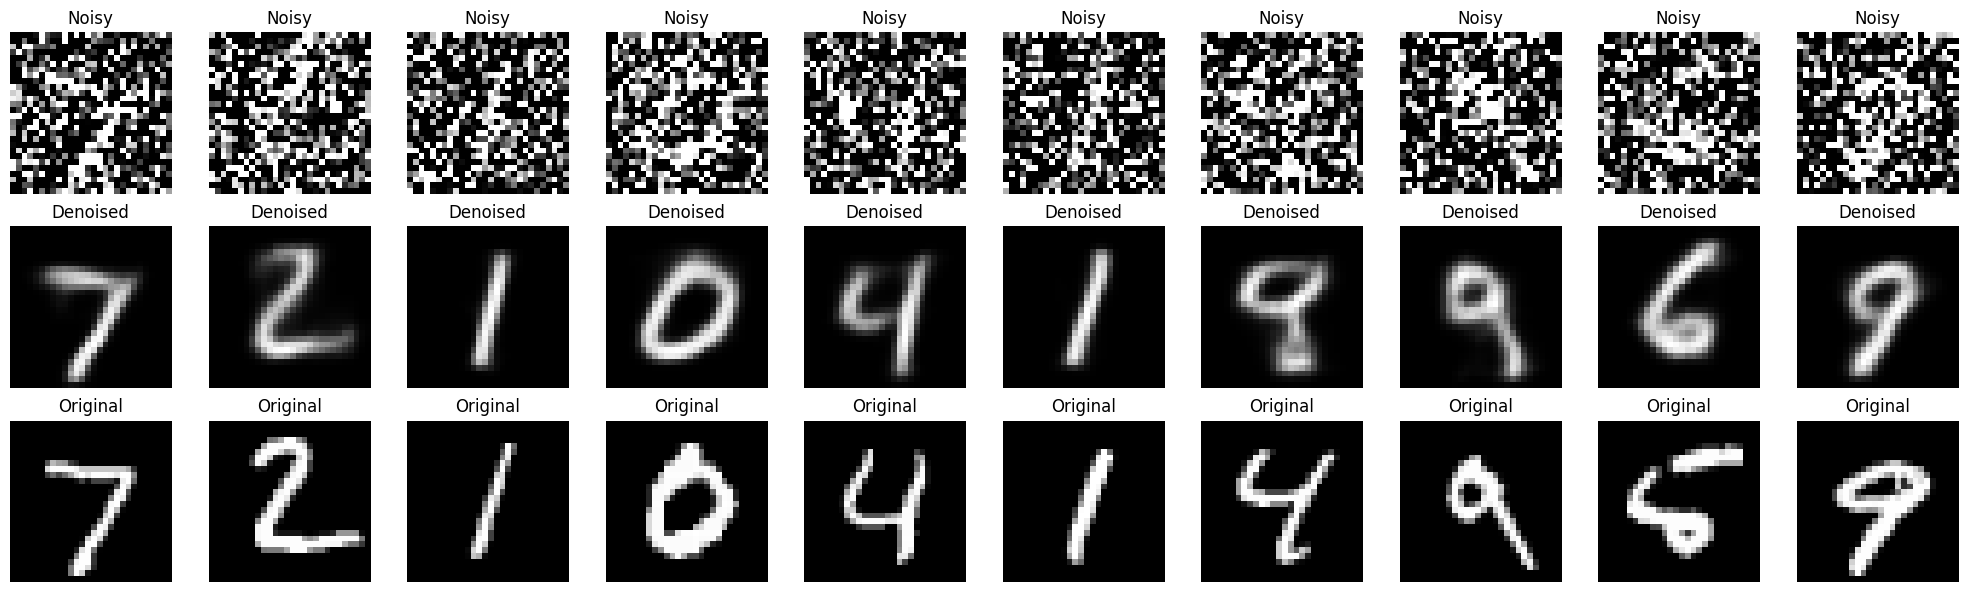

In [109]:

# Use the trained model to denoise the test images
decoded_imgs = autoencoder.predict(x_test_noisy)

# Display a few examples
n = 10  # Number of images to show
plt.figure(figsize=(20, 6))

for i in range(n):

    # Original clean image
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title("Original")
    plt.axis("off")

    # Noisy image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="gray")
    plt.title("Noisy")
    plt.axis("off")

    # Denoised image from autoencoder
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.title("Denoised")
    plt.axis("off")


plt.tight_layout()
plt.show()


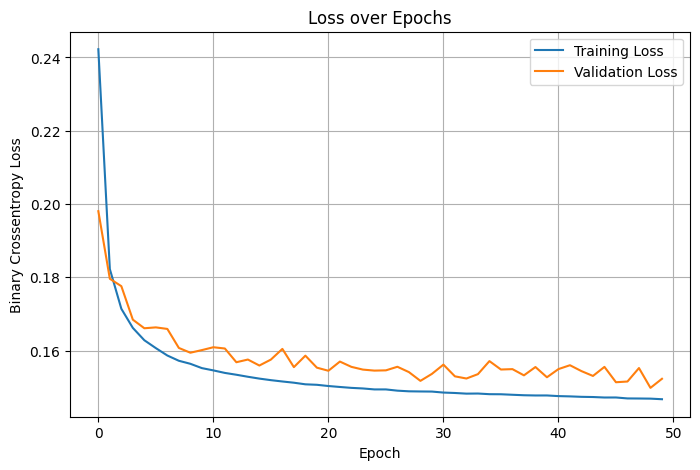

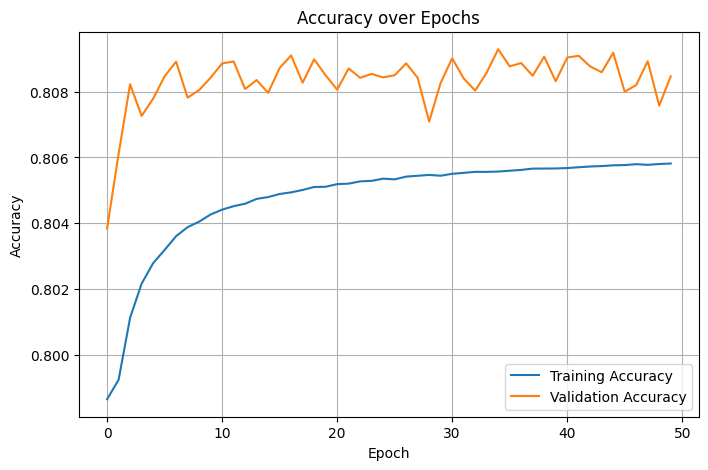

In [110]:
import matplotlib.pyplot as plt

# Plot Loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Binary Crossentropy Loss')
plt.legend()
plt.grid(True)
plt.show()


# Plot Accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [116]:
from google.colab import files
uploaded = files.upload()


Saving photo_2025-07-18_16-53-53.jpg to photo_2025-07-18_16-53-53 (3).jpg


In [117]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Get filename
filename = list(uploaded.keys())[0]

# Load, convert to grayscale, and resize to 28x28
img = Image.open(filename).convert('L').resize((28, 28))

# Convert to NumPy array
img_array = np.array(img).astype('float32')

# Print shape and range
print("Shape:", img_array.shape)
print("Pixel range:", img_array.min(), "to", img_array.max())


Shape: (28, 28)
Pixel range: 45.0 to 215.0


In [118]:
# Normalize pixel values to [0, 1]
img_array = img_array / 255.0

# Optional: Invert if background is white and digit is dark
img_array = 1.0 - img_array

# Reshape to match model input: (1, 28, 28, 1)
img_input = np.expand_dims(img_array, axis=(0, -1))


In [119]:
denoised_img = autoencoder.predict(img_input)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


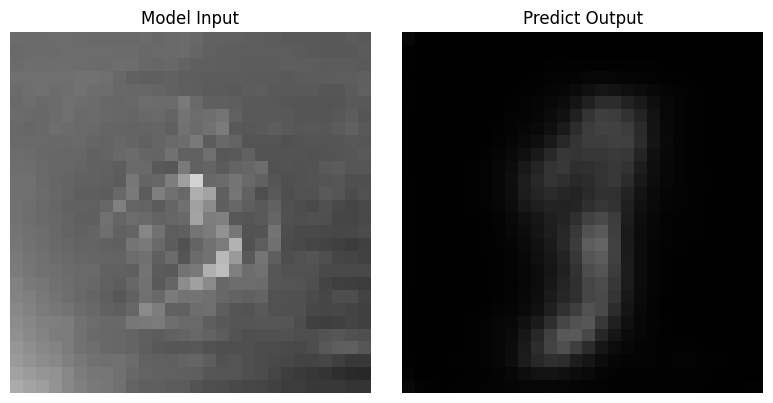

In [120]:
plt.figure(figsize=(8, 4))

# Model input
plt.subplot(1, 2, 1)
plt.imshow(img_input[0].reshape(28, 28), cmap='gray', vmin=0, vmax=1)
plt.title("Model Input")
plt.axis("off")

# Denoised output
plt.subplot(1, 2, 2)
plt.imshow(denoised_img[0].reshape(28, 28), cmap='gray', vmin=0, vmax=1)
plt.title("Predict Output")
plt.axis("off")

plt.tight_layout()
plt.show()
